# Exploratory Data Analysis
  - **Univariate Analysis** of all features, identify dependent and independent variable(s)
  - **Bivariate Analysis** of each dependent variables vs the independent variable

## Variables
  - **Independent Variables** The input variables for us are related to the Customer Profile: Age, CityTier, Occupation, Gender, NumberOfPersonVisiting, PreferredPropertyStar, MaritalStatus, NumberOfTrips, Passport, OwnCar, NumberOfChildrenVisiting, Designation, and MonthlyIncome
  - **Dependent Variable** The variable of interest for us is the Product Pitched. Specifically, when the ProductTaken = 1

In [123]:
#imports
import pandas as pd
import numpy as np
import re
from math import pi
import matplotlib.pyplot as plt
import seaborn as sns
from statannot import add_stat_annotation

%matplotlib inline
sns.set_theme(style='white')

## 2.1 Load Data

In [124]:
# load data

tourism_df = pd.read_csv('../data/intermediate/cleaned_tourism_no_NaN.csv',index_col=0)
tourism_df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,39.0,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [125]:
#create secondary dataframe without the income outliers

no_income_outlier_df = tourism_df[(tourism_df['MonthlyIncome'] < 50000) & (tourism_df['MonthlyIncome'] > 10000)]

## 2.2 Univariate Analysis

C:\Users\ingal\AppData\Local\Temp/ipykernel_6092/73262443.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  tourism_df.iloc[:,1:29].hist(ax=ax);


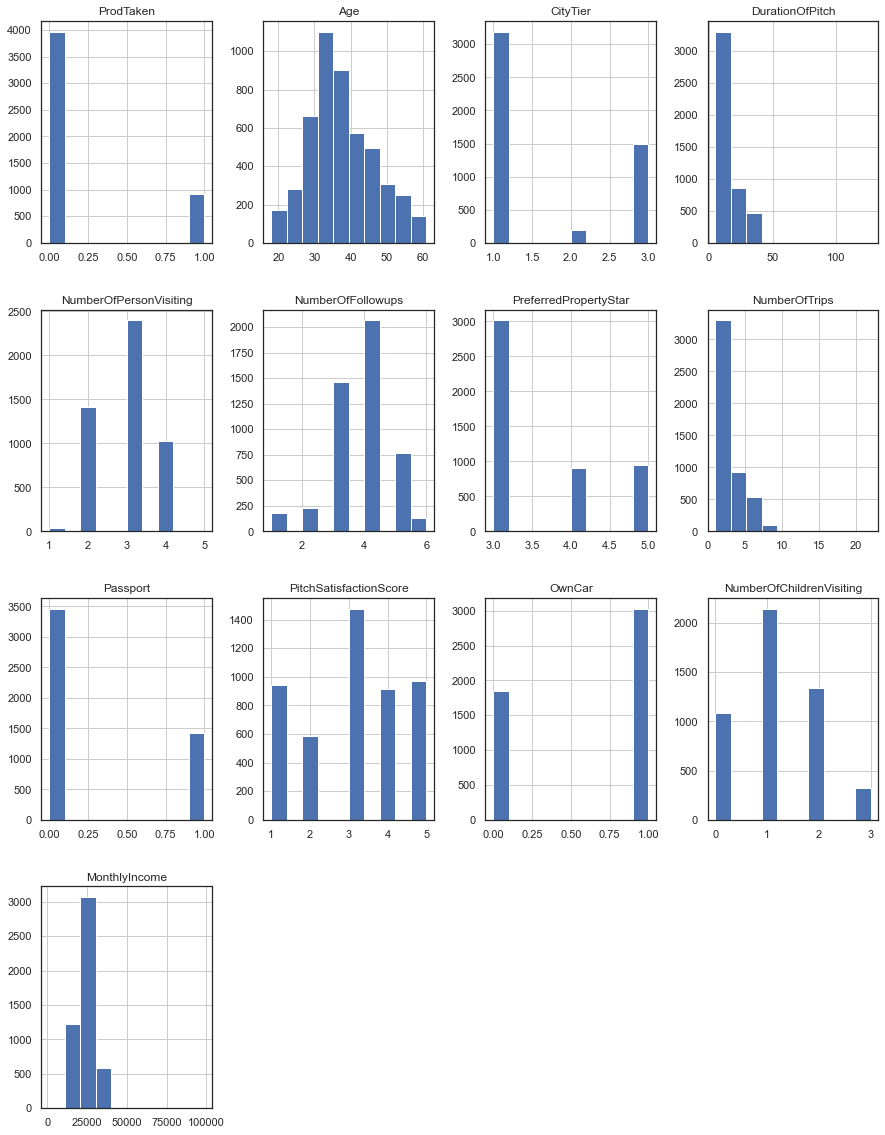

In [126]:
fig = plt.figure(figsize = (15,20));
ax = fig.gca();
tourism_df.iloc[:,1:29].hist(ax=ax);

There is definitely skew of data with our discrete variables (Number of Children Visiting, Number of Trips, PitchSatisfactionScore). 

While Age has a normal distribution, other continuous variables such as MonthlyIncome and Duration of Pitch are skewed to a right-skewed distribution.

The categorical (yes/no) data is not evenly distributed. For example, Passport has about double the records of no than as yes. Similar, while OwnCar has about 2/5 no to 3/5 yes.

#### Occupation

C:\Users\ingal\AppData\Local\Temp/ipykernel_6092/231225016.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation=90)


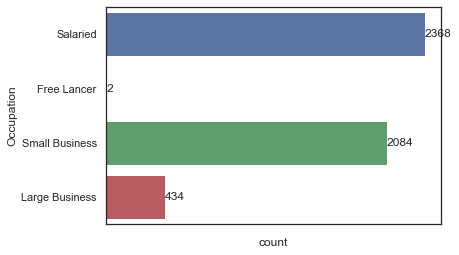

In [127]:
ax = sns.countplot(data=tourism_df, y='Occupation')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
for i in ax.containers:
    ax.bar_label(i,)

I'm still unsure about this feature. I can't tell if it means they own a small business or work at a small business. I would definitely need to go back to the source to understand this better before implementing it into the model. For now we will leave it out.

#### Marital Status

C:\Users\ingal\AppData\Local\Temp/ipykernel_6092/1175745626.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation=90)


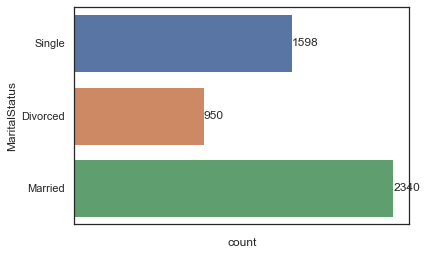

In [128]:
ax = sns.countplot(data=tourism_df, y='MaritalStatus')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
for i in ax.containers:
    ax.bar_label(i,)

Just more confirmation that our categorical data has is unbalanced.

#### Designation

C:\Users\ingal\AppData\Local\Temp/ipykernel_6092/3232944463.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation=90)


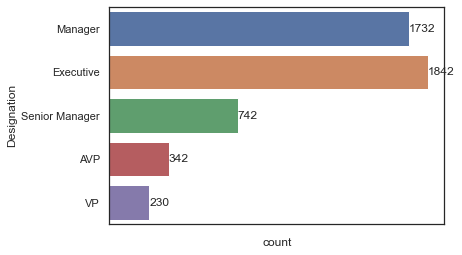

In [129]:
ax = sns.countplot(data=tourism_df, y='Designation')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
for i in ax.containers:
    ax.bar_label(i,)

#### Gender

C:\Users\ingal\AppData\Local\Temp/ipykernel_6092/37800736.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation=90)


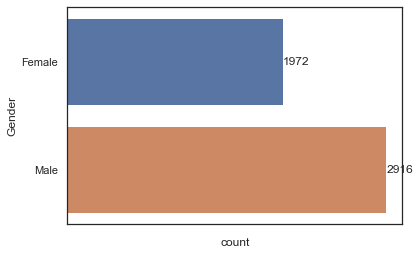

In [130]:
ax = sns.countplot(data=tourism_df, y='Gender')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
for i in ax.containers:
    ax.bar_label(i,)

#### Product Pitched

C:\Users\ingal\AppData\Local\Temp/ipykernel_6092/3605929434.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation=90)


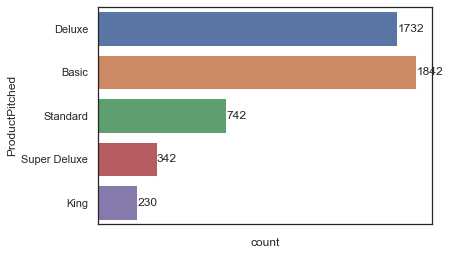

In [131]:
ax = sns.countplot(data=tourism_df, y='ProductPitched')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
for i in ax.containers:
    ax.bar_label(i,)

The majority of packages pitched to customers were Deluxe and Basic. This is interesting since they are on either side of "standard" package. I'm thinking the sales reps either tried to upsell the individual after learning more about them, or downsell if they weren't buying the Standard package. 

- Less individuals were offered the Super Deluxe and King combined when compared to the Standard package. This may speak to the sales team's commitment to the product. It's possible, they don't even see the value in these two offers, so they are less likely to offer to the client.
- Finally, it's possible it relates more to status or monthly income. I noticed there were more Executives and Managers than VP or AVP. This may have some impact with the sales team.

#### Type Of Contact

C:\Users\ingal\AppData\Local\Temp/ipykernel_6092/1293001513.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation=90)


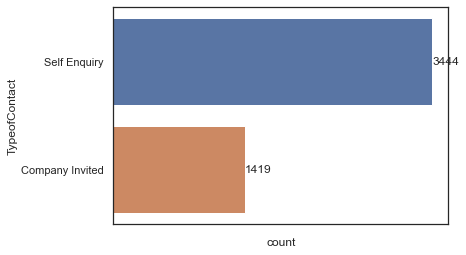

In [132]:
ax = sns.countplot(data=tourism_df, y='TypeofContact')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
for i in ax.containers:
    ax.bar_label(i,)

I won't be using this feature as it's not indicative of the customer profile. This would definitely be a good metric to see if more accepted the product if they were invited or from self enquiry.

## 2.3 Correlation of Variables

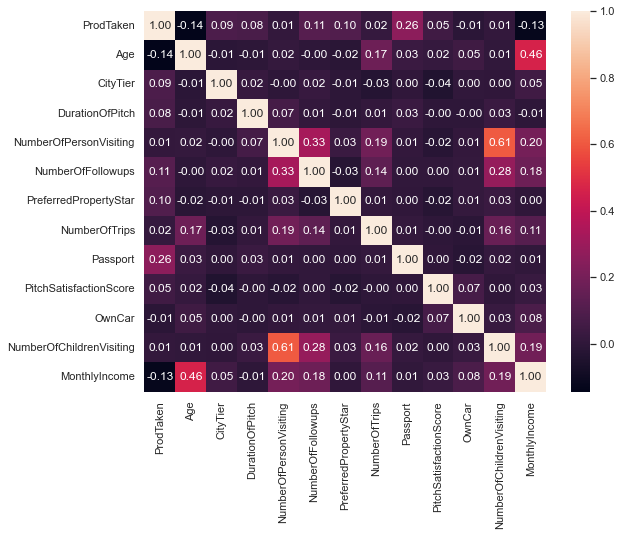

In [133]:
# heatmap correlation of variables, removed CustomerID
fig = plt.figure(figsize = (9,7));
sns.heatmap(tourism_df.iloc[:,1:29].corr(), annot = True, fmt = '.2f');

There doesn't appear to be strong correlations between variables. People Visiting and Children Visiting have a slight correlation, which makes sense considering Children Visiting is most likely included in People Visiting. It may mean that we only need People Visiting for our feature engineering. 

- Age and MonthlyIncome have a slight correlation, which we knew as well.
- Interesting to see that there is a slight correlation with number of followups and number of people visiting. Indicating it required more back and forth when there were more people involved in the vacation.
- As far as whether the product was accepted or not, the strongest correlation was with whether or not there was a passport. I wonder if they were being pitched on international vacations?

### Age vs Monthly Income

c:\Users\ingal\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


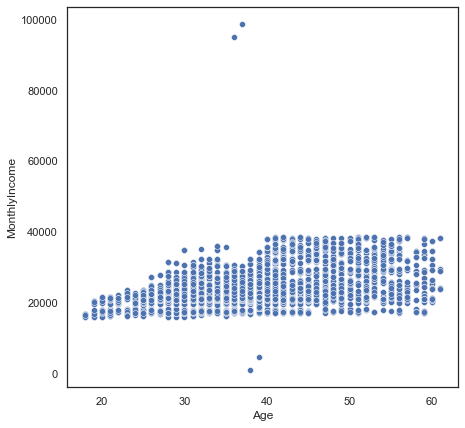

In [134]:
fig = plt.figure(figsize = (7,7));
ax = sns.scatterplot(tourism_df['Age'], tourism_df['MonthlyIncome'])

Here we can see those large monthly income outliers come into play, I will change this to a line graph with confidence interval to get a better representation of the trend.

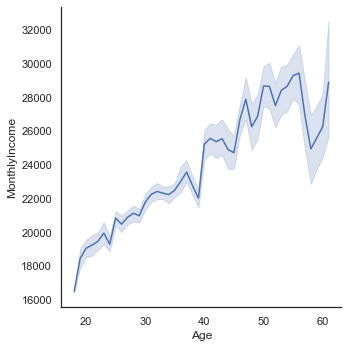

In [135]:
sns.relplot(x = 'Age', y = 'MonthlyIncome', kind = 'line', data = tourism_df)


This shows a tight confidence interval sub 40 years old and a decent correlation, which we saw in the heatmap. 
- It may be that those points need to be removed from our model.

## 2.4 Product Taken vs. Denied
Is there anything noticable when we look at whether or not a consumer bought a package?

### Product Taken vs. Duration of Pitch

Were people upset with length of the pitch? Or did a longer pitch lead to higher acceptance?

<AxesSubplot:xlabel='ProdTaken', ylabel='DurationOfPitch'>

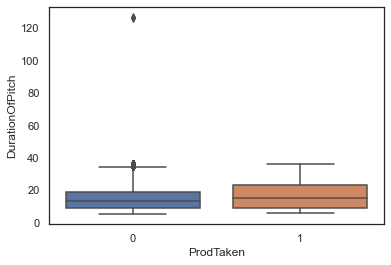

In [136]:
#comparison of product accepted based number of minutes pitching

sns.boxplot(data=tourism_df, x='ProdTaken', y='DurationOfPitch')

### Product Taken vs Mon1thly Income

Did the amount of money an individual have impact their decision? Were some outpriced?

<AxesSubplot:xlabel='ProdTaken', ylabel='MonthlyIncome'>

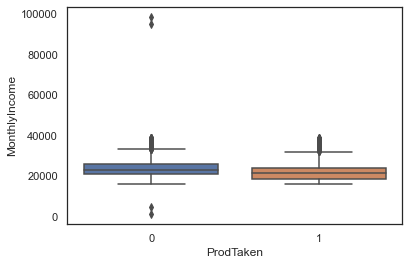

In [137]:
sns.boxplot(data=tourism_df, x='ProdTaken', y='MonthlyIncome')

### Product Taken vs Age

Were product accepted more by older or younger groups in general?

<AxesSubplot:xlabel='ProdTaken', ylabel='Age'>

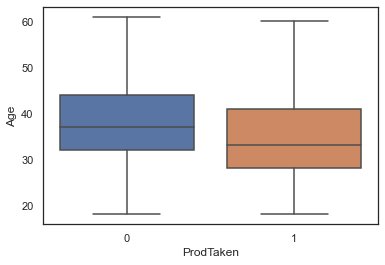

In [138]:
sns.boxplot(data=tourism_df, x='ProdTaken', y='Age')

### Product Taken vs Number of Trips

<AxesSubplot:xlabel='ProdTaken', ylabel='NumberOfTrips'>

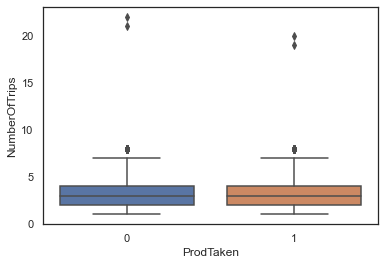

In [139]:
sns.boxplot(data=tourism_df, x='ProdTaken', y='NumberOfTrips')

### Product Taken vs Number of Children Visiting

<AxesSubplot:xlabel='ProdTaken', ylabel='NumberOfChildrenVisiting'>

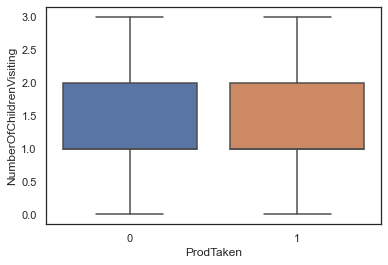

In [140]:
sns.boxplot(data=tourism_df, x='ProdTaken', y='NumberOfChildrenVisiting')

### Product Taken vs Number of People Visiting

<AxesSubplot:xlabel='ProdTaken', ylabel='NumberOfPersonVisiting'>

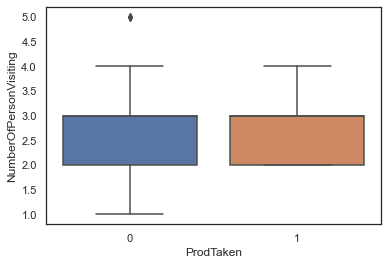

In [141]:
sns.boxplot(data=tourism_df, x='ProdTaken', y='NumberOfPersonVisiting')

### Product Taken vs Pitch Satisfaction Score

<AxesSubplot:xlabel='ProdTaken', ylabel='PitchSatisfactionScore'>

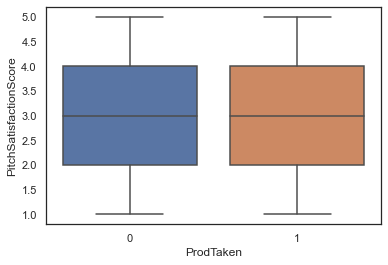

In [142]:
sns.boxplot(data=tourism_df, x='ProdTaken', y='PitchSatisfactionScore')

As I suspected, there isn't any difference in their pitch satisfaction when they accept vs. deny the product. 

### Monthly Income vs Age Comparing Product Taken

<AxesSubplot:xlabel='Age', ylabel='MonthlyIncome'>

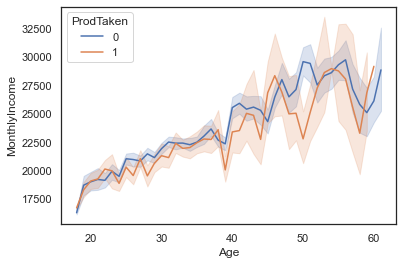

In [143]:
sns.lineplot(data=tourism_df, x= 'Age', y='MonthlyIncome',hue='ProdTaken')

There isn't a real difference in categories when the product was taken vs. not taken.

Overall, there wasn't anything I saw that would indicate a drastic reason behind acceptance or denial of the product. This is a great candidate for ML.

## 2.5 Products Pitched

Let's look at the different products that are being pitched. Are there any trends in the customer profile for each product? 

### Monthly Income

<AxesSubplot:xlabel='ProductPitched', ylabel='MonthlyIncome'>

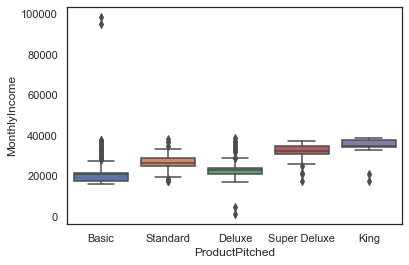

In [144]:
sns.boxplot(data=tourism_df, x='ProductPitched', y='MonthlyIncome', order = ['Basic','Standard','Deluxe','Super Deluxe', 'King'])

There is an increase in monthly income from basic to king products. Interesting that the deluxe package had a small dip in monthly income profile. 

### Monthly Income split by Gender

<AxesSubplot:xlabel='ProductPitched', ylabel='MonthlyIncome'>

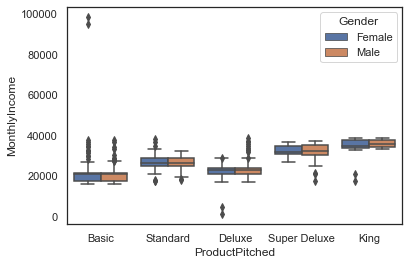

In [145]:
sns.boxplot(data=tourism_df, x='ProductPitched', y='MonthlyIncome', hue='Gender', order = ['Basic','Standard','Deluxe','Super Deluxe', 'King'])

even when split by gender, we see the same trends

### Age split by Product Taken or Not

<AxesSubplot:xlabel='ProductPitched', ylabel='Age'>

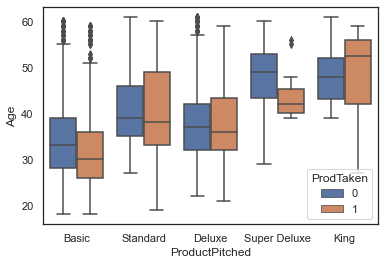

In [146]:
sns.boxplot(data=tourism_df, x='ProductPitched', y='Age', hue = 'ProdTaken', order = ['Basic','Standard','Deluxe','Super Deluxe', 'King'])

There does seem to be a difference in Age statstics when comparing the Product Taken or not for each of the packages. In particular, we can see that for the super deluxe package, the product was accepted more readily by a younger group than the product was rebuked by.

### Significant Difference of Product Pitched vs. Age

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Basic v.s. Standard: Welch's t-test independent samples with Bonferroni correction, P_val=1.258e-77 stat=-2.000e+01
Deluxe v.s. Standard: Welch's t-test independent samples with Bonferroni correction, P_val=5.277e-18 stat=-8.940e+00
Deluxe v.s. Super Deluxe: Welch's t-test independent samples with Bonferroni correction, P_val=8.195e-105 stat=-2.744e+01
Basic v.s. King: Welch's t-test independent samples with Bonferroni correction, P_val=8.975e-108 stat=-3.288e+01


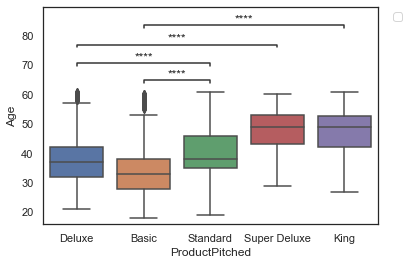

In [147]:
ax = sns.boxplot(data=tourism_df, x='ProductPitched', y='Age')

add_stat_annotation(ax, data=tourism_df, x='ProductPitched', y='Age',
                    box_pairs=[(("Basic"), ("Standard")),
                                 (("Deluxe"), ("Super Deluxe")),
                                 (("King"), ("Basic")),
                                 (("Deluxe"), ("Standard")),
                                ],
                    test='t-test_welch', text_format='star', loc='inside', verbose=2)
plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))

It looks as if age plays a large factor in which package they recommend. The older crowd (~50 years) is recommended the higher packages than the younder crowd (~40 years)

### Significant Difference of Product Pitched vs. Monthly Income and Product Accepted

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Basic_0 v.s. Basic_1: Welch's t-test independent samples with Bonferroni correction, P_val=1.000e+00 stat=-1.533e+00
Deluxe_0 v.s. Deluxe_1: Welch's t-test independent samples with Bonferroni correction, P_val=3.822e-01 stat=-2.040e+00
Standard_0 v.s. Standard_1: Welch's t-test independent samples with Bonferroni correction, P_val=3.115e-01 stat=2.132e+00
King_0 v.s. King_1: Welch's t-test independent samples with Bonferroni correction, P_val=1.000e+00 stat=1.054e+00
Super Deluxe_0 v.s. Super Deluxe_1: Welch's t-test independent samples with Bonferroni correction, P_val=3.951e-02 stat=3.201e+00
Basic_0 v.s. Standard_0: Welch's t-test independent samples with Bonferroni correction, P_val=3.212e-300 stat=-4.638e+01
Deluxe_0 v.s. Standard_0: Welch's t-test independent samples with Bonferroni correction, P_val=6.271e-175 stat=-3

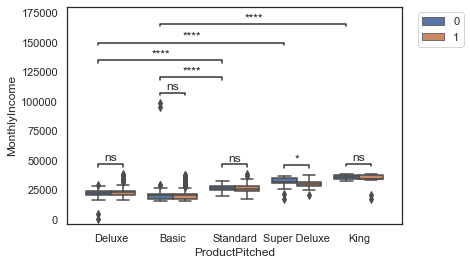

In [148]:
ax = sns.boxplot(data=tourism_df, x='ProductPitched', y='MonthlyIncome', hue = 'ProdTaken')

add_stat_annotation(ax, data=tourism_df, x='ProductPitched', y='MonthlyIncome', hue = 'ProdTaken',
                    box_pairs=[(("Basic",0), ("Standard",0)),
                                 (("Deluxe",0), ("Super Deluxe",0)),
                                 (("King",0), ("Basic",0)),
                                 (("Deluxe",0), ("Standard",0)),
                                 (("King",0),("King",1)),
                                 (("Standard",0),("Standard",1)),
                                 (("Deluxe",0),("Deluxe",1)),
                                 (("Basic",0),("Basic",1)),
                                 (("Super Deluxe",0),("Super Deluxe",1))
                                ],
                    test='t-test_welch', text_format='star', loc='inside', verbose=2)
plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))

While there is no difference in MonthlyIncome within a ProductPitch that determined whether or not the product was taken, there were significant difference between each category of ProductPitched, when looking at Monthly Incoome. Meaning the Sales rep used income as another tool to potentially pitch their product to the customer.

#### Scatter of Age vs. Monthly Income for all products

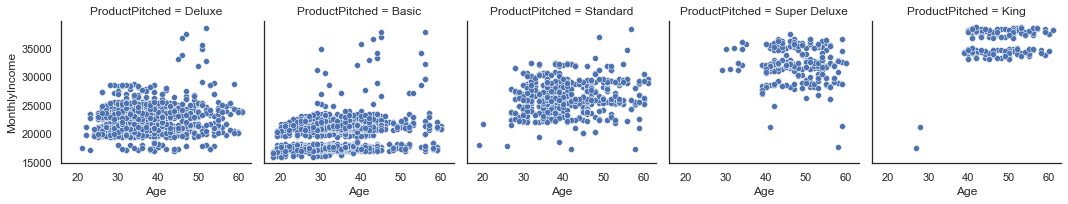

In [149]:
g = sns.FacetGrid(no_income_outlier_df, col="ProductPitched")
g.map_dataframe(sns.scatterplot, x="Age", y="MonthlyIncome")

There is a steady rise in income from Basic to King, although Standard looks to have a higher averatge income than Deluxe. 
- The King data appears to be duplicated but offset by like $1000. The pattern looks almost exactly the same. This is probably just poor toy data creation, but would be something to look into for a real dataset.

Are there any patterns here between productTaken?

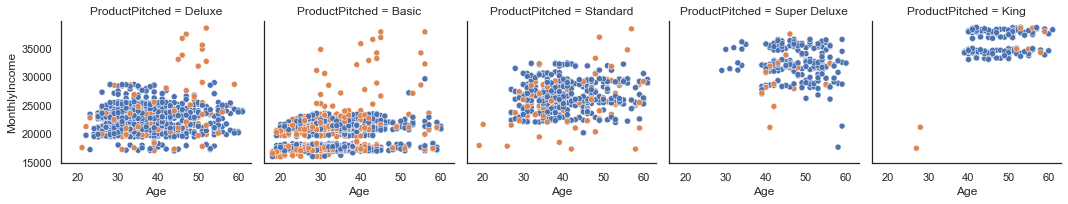

In [150]:
g = sns.FacetGrid(no_income_outlier_df, col="ProductPitched")
g.map_dataframe(sns.scatterplot, x="Age", y="MonthlyIncome", hue= 'ProdTaken')

It's interesting that the majority of the accepted packages come from the Basic package and even more so, its when that customer has a high monthly salary. 
- The acceptance rate of the customer, may actually not be about the attributes of the customer, the company may want to look at the package offerings and whether the customer is seeing the value.

The pattern with the king data is even more pronounced with the difference in accepted and rejected products. A similar phenomena is appearing in the super deluxe graph as well.

### Product Pitched vs Designations
Since there seems to be trends with how the sales associates pitch, I'm curious if there are any trends with accepted products and the designations.

In [151]:
# How do the 'Designations' line up with packages picked?

tourism_df_taken = tourism_df[tourism_df['ProdTaken'] == 1]

In [152]:
tourism_df_taken.groupby(['ProductPitched','Designation'])['Designation'].agg('count')

ProductPitched  Designation   
Basic           Executive         552
Deluxe          Manager           204
King            VP                 20
Standard        Senior Manager    124
Super Deluxe    AVP                20
Name: Designation, dtype: int64

Ok. That's interesting. The Products pitched are an exact 1:1 with the designations. At least when considering the products that were accepted. 
- Let's check the entire dataset, if this only occurs with the accepted products its a great metric (though very bizzare to have 100% accuracy).

In [153]:
tourism_df.groupby(['ProductPitched','Designation'])['Designation'].agg('count')

ProductPitched  Designation   
Basic           Executive         1842
Deluxe          Manager           1732
King            VP                 230
Standard        Senior Manager     742
Super Deluxe    AVP                342
Name: Designation, dtype: int64

It looks at though the sale associate pitched the package based on the designation of the customer 100% of the time. This will completely destroy any model since it would be a 1:1. 
- We will remove designation from the model 

### Pitch Satisfaction vs Product Pitched

Curious what each Package looks like in terms of counts of pitch satisfaction.

In [154]:
# group and aggregate the counts based on product pitched and pitch satisfaction
melted_satifaction = tourism_df.groupby(['ProductPitched','PitchSatisfactionScore'])['ProductPitched'].agg(['count']).reset_index()

In [155]:
# pivot the table wider so the satisfaction scores are columns
melted_satifaction=melted_satifaction.set_index(['ProductPitched','PitchSatisfactionScore'])['count'].unstack().reset_index()

In [156]:
melted_satifaction

PitchSatisfactionScore,ProductPitched,1,2,3,4,5
0,Basic,358,204,550,390,340
1,Deluxe,352,220,552,280,328
2,King,40,34,48,50,58
3,Standard,146,102,202,144,148
4,Super Deluxe,46,26,126,48,96


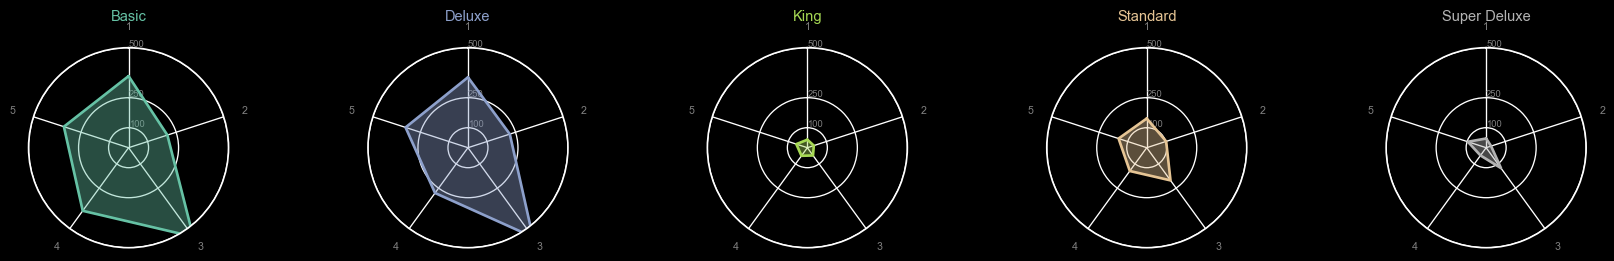

In [165]:
# My favorite way to see this is with as radar chart or spider graph
def make_spider(df, group, row, title, color):
    """
        This function takes a data frame, the feature you want to iterate over and each row of data that is also used from each grouped by category and creates a radar chart for each category.        
        Args:
            df (dataframe): dataframe with require inputs
            group (string): what feature you are using to iterate the radar charts
            row (integer): row of data you are plotting (turns into position on subplot)
            title (string): title for the radar chart for each sub chart
            color (string): color for the radar chart for each sub chart        
            adapted from python-graph-gallery
    """
    # Number of variables
    categories = list(df)[1:7]
    N = len(categories)

    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    ax = plt.subplot(6, 5, row+1, polar = True, )
    plt.subplots_adjust(left = 0.1, bottom = 0.1, right = 0.9, 
                        top = 0.9, wspace = 0.4, hspace = 0.4)
    
    ax.set_theta_offset(pi/2)
    ax.set_theta_direction(-1)

    plt.xticks(angles[:-1], categories, color = "grey", size = 8)
    plt.style.use("dark_background")
    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([100,250,500], ["100", "250", "500"], color="grey", size = 7)
    plt.ylim(0,500)

    # Ind1
    values = df.loc[row].drop(labels = [group]).values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, color = color, linewidth = 2, linestyle = 'solid')
    ax.fill(angles, values, color = color, alpha = 0.4)

    # Add a title
    plt.title(title, size=11, color=color, y=1.1)
 
# ------- PART 2: Apply the function to all individuals
# initialize the figure
my_dpi = 96
plt.figure(figsize = (2000/my_dpi, 2000/my_dpi), dpi = my_dpi)

# Create a color palette:
my_palette = plt.cm.get_cmap("Set2", len(melted_satifaction.index))


# Loop to plot
for row in range(0, len(melted_satifaction.index)):
    make_spider(df = melted_satifaction,  group = 'ProductPitched', 
                row = row, title = melted_satifaction['ProductPitched'][row], 
                color = my_palette(row))
    

Just like we saw during the cleanup phase, there is a strong urge towards a 3 for satisfaction. Additionally, the data is heavily unbalanced towards deluxe and basic. This will need to be addressed in the model.

## 2.6 City Tier

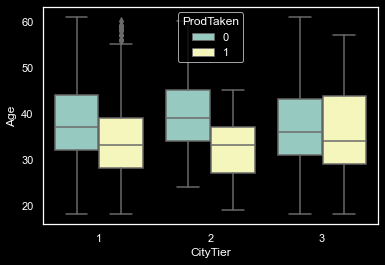

In [158]:
ax = sns.boxplot(data=tourism_df, x='CityTier', y='Age', hue = 'ProdTaken')

There is a difference in age when comparing city tier 1 and 2 whether or not they have taken the product, with older customer choosing not to take the product 

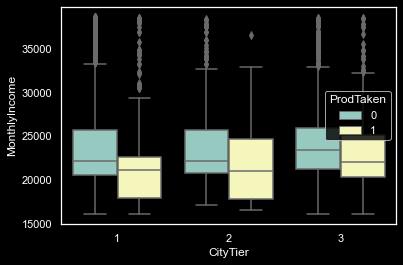

In [159]:
ax = sns.boxplot(data=no_income_outlier_df, x='CityTier', y='MonthlyIncome', hue = 'ProdTaken')

There does seem to be variablity in Tier 1 for Monthly Income when looking at whether a product was accepted or rejected. 

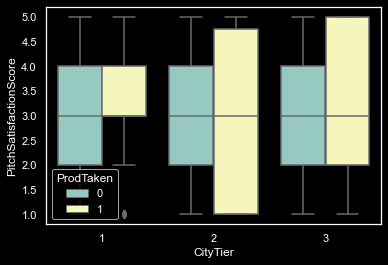

In [160]:
ax = sns.boxplot(data=tourism_df, x='CityTier', y='PitchSatisfactionScore', hue = 'ProdTaken')

Just like other areas, we are seeing mostly a 3 for satisfaction.

<AxesSubplot:xlabel='ProductPitched', ylabel='count'>

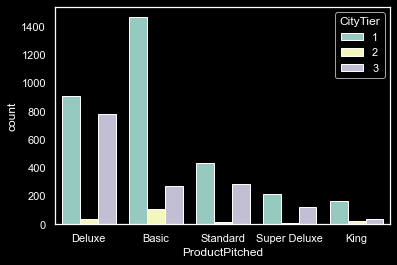

In [161]:
sns.countplot(data=tourism_df, x='ProductPitched', hue = 'CityTier')

City Tier is a really interesting feature, but not in a good way right now. If we had more data on the second tier it could be really valuable. As it stands, there imbalance may be too great and it might get removed during feature selection

<AxesSubplot:xlabel='Age', ylabel='MonthlyIncome'>

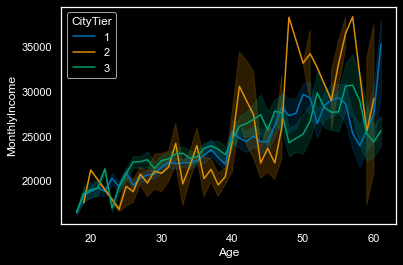

In [162]:
sns.lineplot(data=tourism_df, x= 'Age', y='MonthlyIncome',hue='CityTier',palette='colorblind')

Nothing of interest here. Tier 1 and 3 are very similar and 2 doesn't have enough data for a quality graph.